<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1> Classification Model Development</h1>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Student - Oyindamola Iwalehin <br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
# importing datetime to ensure the timely execution of the code

from datetime import datetime

# start by counting the time

startTime = datetime.now()


We Importing various Python libraries for data analysis and machine learning, including numpy, pandas, matplotlib, sklearn, statsmodels, seaborn, and others. We are also loading and displaying data from Excel files using pandas, setting print options, and using various machine learning models and evaluation metrics.

In [2]:
# importing libraries
import numpy as np  # mathematical essentials
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
from sklearn.model_selection import train_test_split # training and testing
import statsmodels.formula.api as smf # linear modeling
import seaborn           as sns          # enhanced data viz
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestClassifier     # random forest classifier
from sklearn.ensemble import GradientBoostingClassifier # gbm classifier
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.metrics import accuracy_score



# loading data
CSS = pd.read_excel('./Cross_Sell_Success_dataset_2023(1).xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
CSS.head(n = 5)

# reading the file into Python
Apprentice_Chef = pd.read_excel('Apprentice_chef_dataset_2023(3).xlsx')

Apprentice_Chef.head(2000)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.000,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.000,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.000,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.000,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.500,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,2940.000,Wat (Barleycorn),wat.(barleycorn)@live.com,Wat,NaN,89,6,13,3,143.0,1,5,2,8,0,53.00,5,2.894737,16
1942,7087.500,Hendry Bracken,hendry.bracken@exxon.com,Hendry,Bracken,155,7,13,9,169.4,0,6,2,0,8,39.00,5,2.631579,302
1943,6562.500,Aenys I Targaryen,aenys.i.targaryen@passport.com,Aenys,I Targaryen,65,9,13,6,187.4,1,5,1,0,9,48.00,6,2.631579,310
1944,5355.000,Leo Blackbar,leo.blackbar@pg.com,Leo,Blackbar,58,9,18,10,238.5,3,6,1,0,0,31.00,6,2.631579,275


This code defines three user-defined functions. The first function, mv_flagger(), flags all columns in a DataFrame that have missing values with 'm-COLUMN_NAME'. The second function, visual_cm(), creates a visualization of a confusion matrix to evaluate the performance of a classification model. The third function, text_split_feature(), splits values in a string Series (as part of a DataFrame) and sums the number of resulting items, then appends the summed column to the original DataFrame.
User-Defined Functions
Run the code in below cell to instantiate some user-defined functions useful for this analysis.

In [3]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df

########################################
# visual_cm
########################################

def visual_cm(true_y, pred_y, labels = None):
    """
This function generates a visual representation of a confusion matrix, which is a tool for evaluating the performance 
of a classification model. The function takes three parameters: the true values of the response variable, 
the predicted values of the response variable, and an optional list of labels.


Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    
    


#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

below, we are pulling up the data dictionary for the "Apprentice_Chef" dataset by reading the "Apprentice_Chef_Data_Dictionary.xlsx" file into a Pandas DataFrame called "Chef_Data_description". The purpose of this is to get a description of each column in the dataset, including its data type, meaning, and potential values. We then display the data dictionary using the "Chef_Data_description.head()" method.


In [4]:
# pulling up data dictionary
Chef_Data_description = pd.read_excel('./Apprentice_Chef_Data_Dictionary.xlsx')


# displaying the data dictionary
Chef_Data_description

,Feature,Data Type,Description
0,REVENUE,Float,Total revenue generated from each customer. Note that at times discounts are applied due to spec...
1,CROSS_SELL_SUCCESS,Integer,"Success of the cross-sell promotion (1 = yes, 0 = no)"
2,NAME,string,Full name of customer
3,EMAIL,string,Email of customer
4,FIRST_NAME,string,First name of customer
5,FAMILY_NAME,string,Last name of customer
6,TOTAL_MEALS_ORDERED,Integer,Total number of meals ordered by each customer. Customers can order several meals at one time.
7,UNIQUE_MEALS_PURCH,Integer,Number of unique meal sets ordered by each customer
8,CONTACTS_W_CUSTOMER_SERVICE,Integer,Number of times each customer made contact with customer service. This number does not include r...
9,PRODUCT_CATEGORIES_VIEWED,Integer,"Total number of meal categories viewed (vegan, etc.)"


Here, the info() method of the pandas dataframe CSS is used to print information about the dataframe, such as the number of rows and columns, the data types of each column, and the number of non-null values in each column. The verbose parameter is set to True to provide detailed information about the dataframe.

In [5]:
# INFOrmation about each variable
CSS.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   EMAIL                        1946 non-null   object 
 2   REVENUE                      1946 non-null   float64
 3   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   PC_LOGINS                    1946 non-null   int64  
 10  MOBILE_LOGINS                1946 non-null   int64  
 11  WEEKLY_PLAN                  1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  AVG_PREP_VID_TIME 

Here, we are reading a data dictionary for the Cross-Sell Success dataset from the Excel file  'Cross_Sell_Success_dataset_2023(1).xlsx' using the pandas read_excel function and assigning it to the variable CSS_description. Then, we are displaying the contents of the data dictionary using the CSS_description variable. The data dictionary contains information about each variable (column) in the dataset, including its name, data type, and description.

In [6]:
# pulling up data dictionary
CSS_description = pd.read_excel('./Cross_Sell_Success_dataset_2023(1).xlsx')


# displaying the data dictionary
CSS_description

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,1,steffon.baratheon@yahoo.com,4920.000,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,0,harlon.greyjoy@visa.com,6150.000,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,0,monster@protonmail.com,3435.000,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,1,damon.lannister.(lord)@yahoo.com,3330.000,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,1,raynald.westerling@jnj.com,3427.500,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0,wat.(barleycorn)@live.com,2940.000,89,6,13,3,143.0,1,5,2,8,0,53.00,5,2.894737,16
1942,1,hendry.bracken@exxon.com,7087.500,155,7,13,9,169.4,0,6,2,0,8,39.00,5,2.631579,302
1943,0,aenys.i.targaryen@passport.com,6562.500,65,9,13,6,187.4,1,5,1,0,9,48.00,6,2.631579,310
1944,1,leo.blackbar@pg.com,5355.000,58,9,18,10,238.5,3,6,1,0,0,31.00,6,2.631579,275


Here we are checking the number of missing values in each column (feature) of the "CSS" dataset using the isnull() function to identify missing values and sum() to add up the total count of missing values for each column. The parameter axis = 0 specifies that we want to sum the values by columns (features).

In [7]:
# checking each feature for missing values
CSS.isnull().sum(axis = 0)

CROSS_SELL_SUCCESS             0
EMAIL                          0
REVENUE                        0
TOTAL_MEALS_ORDERED            0
UNIQUE_MEALS_PURCH             0
CONTACTS_W_CUSTOMER_SERVICE    0
PRODUCT_CATEGORIES_VIEWED      0
AVG_TIME_PER_SITE_VISIT        0
CANCELLATIONS_AFTER_NOON       0
PC_LOGINS                      0
MOBILE_LOGINS                  0
WEEKLY_PLAN                    0
LATE_DELIVERIES                0
AVG_PREP_VID_TIME              0
LARGEST_ORDER_SIZE             0
AVG_MEAN_RATING                0
TOTAL_PHOTOS_VIEWED            0
dtype: int64

using the .describe() method on the CSS DataFrame to observe the descriptive statistics for all the numerical features in the dataset. The parameter include = 'number' is used to include only the numerical columns. The .round(2) method is used to round the statistics to two decimal place

In [8]:
#Code to observe the descriptive statistics
CSS.describe(include = 'number').round(2)

,CROSS_SELL_SUCCESS,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.68,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,0.47,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,0.00,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,0.00,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1.00,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,1.00,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,1.00,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


we are running the mv_flagger function on the CSS DataFrame. The mv_flagger function flags all columns that have missing values with 'm-COLUMN_NAME', where COLUMN_NAME is the name of the column. By running this function, we are trying to flag all the missing values in the CSS DataFrame.

After running the function, we are checking the resulting DataFrame columns to confirm that the function worked as expected.

In [9]:
# running the mv_flagger function
CSS = mv_flagger(df = CSS)


# checking results
CSS.columns 

Index(['CROSS_SELL_SUCCESS', 'EMAIL', 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

using an F-string to print out the dimensions of the Cross Sell Success dataset. We are trying to observe the number of observations (rows) and features (columns) in the dataset. The CSS.shape[0] attribute gives the number of rows, and CSS.shape[1] gives the number of columns. This information is helpful for understanding the size and structure of the dataset.

In [10]:
#  observing rows and columns in the dataset

# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {CSS.shape[0]}
Features:     {CSS.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     17



In [11]:
#Code to observe the descriptive statistics
CSS.describe(include = 'number').round(2)

,CROSS_SELL_SUCCESS,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.68,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,0.47,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,0.00,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,0.00,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1.00,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,1.00,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,1.00,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00




This code calculates the correlation between each variable and the target variable, CROSS_SELL_SUCCESS, and sorts them in descending order. The result shows that the variable with the strongest positive correlation with the target variable is CANCELLATIONS_AFTER_NOON, followed by MOBILE_LOGINS and UNIQUE_MEALS_PURCH. The variables with the strongest negative correlation with the target variable are AVG_MEAN_RATING, followed by WEEKLY_PLAN and PRODUCT_CATEGORIES_VIEWED.

The correlation coefficient ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. A positive correlation means that as one variable increases, the other variable also increases. A negative correlation means that as one variable increases, the other variable decreases.

Therefore, based on the correlation analysis, the company might want to focus on reducing cancellations after noon and increasing mobile logins and unique meals purchased in order to increase the likelihood of cross-selling success. Additionally, the company may want to focus on improving the average meal rating and increasing the weekly plan to decrease the likelihood of cross-selling success.


In [12]:
df_corr = CSS.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
PC_LOGINS                      0.04
AVG_TIME_PER_SITE_VISIT        0.03
LATE_DELIVERIES                0.02
LARGEST_ORDER_SIZE             0.02
TOTAL_MEALS_ORDERED            0.01
AVG_PREP_VID_TIME              0.01
TOTAL_PHOTOS_VIEWED            0.01
REVENUE                        0.00
CONTACTS_W_CUSTOMER_SERVICE   -0.00
PRODUCT_CATEGORIES_VIEWED      0.00
WEEKLY_PLAN                   -0.01
AVG_MEAN_RATING               -0.04
Name: CROSS_SELL_SUCCESS, dtype: float64

 using the value_counts() method to count the number of occurrences of each unique value in the 'CROSS_SELL_SUCCESS' column of the CSS DataFrame.this code gives you the proportion of customers who purchased the promotion ('CROSS_SELL_SUCCESS' = 1) and those who did not ('CROSS_SELL_SUCCESS' = 0).

In [13]:
CSS.loc[ : ,'CROSS_SELL_SUCCESS'].value_counts(normalize = True).round(decimals = 2)

1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64

performing linear regression analysis on the CROSS_SELL_SUCCESS variable against several predictor variables. using the OLS method to fit the data to the blueprint of the model. The lm_practice object contains the model specification, and the results object contains the output of the fitted model.

The output of the model summary shows the values of the regression coefficients, standard errors, t-values, and p-values for each predictor variable, as well as some model fit statistics such as R-squared and adjusted R-squared.

The R-squared value is 0.03, which indicates that only 3% of the variation in the CROSS_SELL_SUCCESS variable is explained by the predictor variables included in the model. This indicates that the model is not a good fit for the data and that some other variables may need to be included or that the model specification needs to be revised.

Additionally, some of the predictor variables have large p-values (>0.05), indicating that they are not statistically significant predictors of CROSS_SELL_SUCCESS. The condition number of the model is also quite large, which suggests that there may be issues with multicollinearity in the model.

we may want to consider revising the model specification by including additional relevant variables or removing variables that are not statistically significant. It may also be helpful for us to explore the data further to gain more insight into the relationships between the variables. lets do this!


In [14]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """CROSS_SELL_SUCCESS ~ UNIQUE_MEALS_PURCH+ REVENUE+
                                       CONTACTS_W_CUSTOMER_SERVICE+
                                       PRODUCT_CATEGORIES_VIEWED+
                                       AVG_TIME_PER_SITE_VISIT+
                                       CANCELLATIONS_AFTER_NOON+ 
                                       PC_LOGINS+
                                       MOBILE_LOGINS+
                                       WEEKLY_PLAN+
                                       AVG_PREP_VID_TIME+
                                       LARGEST_ORDER_SIZE+
                                       AVG_MEAN_RATING+
                                       TOTAL_PHOTOS_VIEWED""",
                      data = CSS)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     CROSS_SELL_SUCCESS   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.590
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           8.15e-08
Time:                        07:38:17   Log-Likelihood:                -1249.6
No. Observations:                1946   AIC:                             2527.
Df Residuals:                    1932   BIC:                             2605.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The purpose is to analyze the correlation between the continuous features and REVENUE in a dataset called CSS. A list of continuous features including REVENUE is created, and then a correlation matrix is developed based on these features using the Pearson method. Finally, the correlation values of each feature with REVENUE are filtered and sorted in descending order.


In [15]:
# creating a list of continuous features (including REVENUE)
continuous_data =                               ['REVENUE', 'CROSS_SELL_SUCCESS',
                                                 'UNIQUE_MEALS_PURCH', 
                                                'CONTACTS_W_CUSTOMER_SERVICE',
                                                'AVG_TIME_PER_SITE_VISIT',
                                                'MOBILE_LOGINS',
                                                'LARGEST_ORDER_SIZE',
                                                'AVG_MEAN_RATING',
                                                'TOTAL_PHOTOS_VIEWED']


# developing a correlation matrix based on continuous features
CSS_corr = CSS[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
CSS_corr.loc[ : , 'CROSS_SELL_SUCCESS'].round(decimals = 2).sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
AVG_TIME_PER_SITE_VISIT        0.03
LARGEST_ORDER_SIZE             0.02
TOTAL_PHOTOS_VIEWED            0.01
REVENUE                        0.00
CONTACTS_W_CUSTOMER_SERVICE   -0.00
AVG_MEAN_RATING               -0.04
Name: CROSS_SELL_SUCCESS, dtype: float64

In [16]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """CROSS_SELL_SUCCESS ~ UNIQUE_MEALS_PURCH+ REVENUE+
                                    AVG_TIME_PER_SITE_VISIT+
                                         AVG_PREP_VID_TIME+
                                       LARGEST_ORDER_SIZE+
                                       TOTAL_PHOTOS_VIEWED""",
                      data = CSS)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     CROSS_SELL_SUCCESS   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9516
Date:                Sat, 04 Mar 2023   Prob (F-statistic):              0.457
Time:                        07:38:17   Log-Likelihood:                -1276.4
No. Observations:                1946   AIC:                             2567.
Df Residuals:                    1939   BIC:                             2606.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

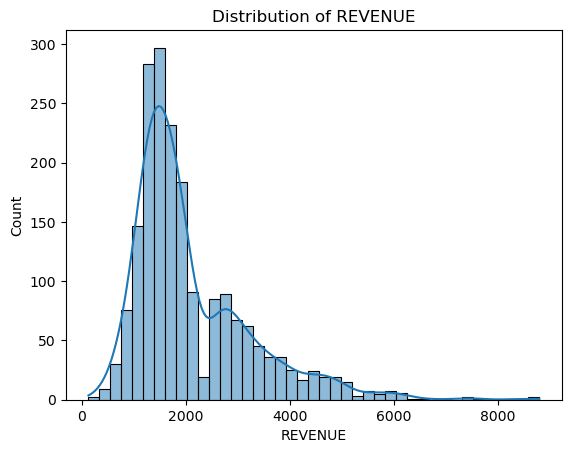

In [17]:
# displaying the plot for 'REVENUE'
sns.histplot(x = 'REVENUE',
            data = CSS,
            kde = True)


# title and labels
plt.title('Distribution of REVENUE')


# displaying the plot
plt.show()

The purpose of this code is to analyze the correlation between various continuous features and the revenue of a company. The code first creates a list of continuous features, including revenue, and then develops a correlation matrix based on these features using the Pearson method. The code then filters the results to show only the correlations with revenue, with the output displaying the correlation coefficients sorted in descending order.

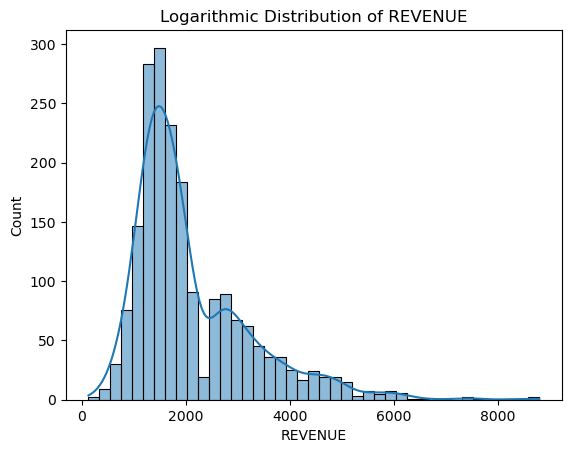

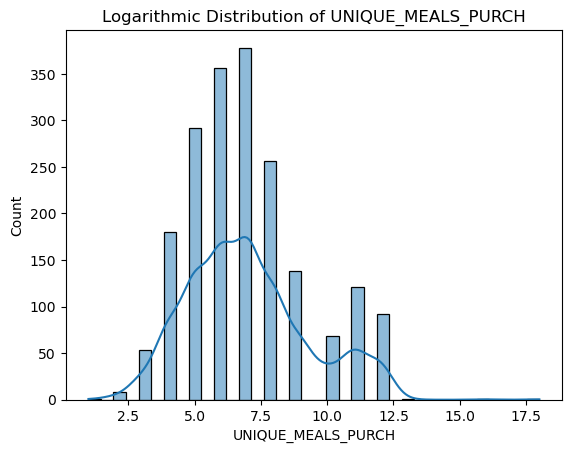

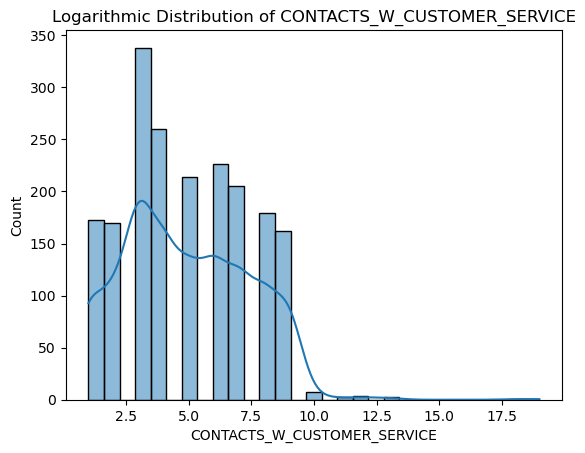

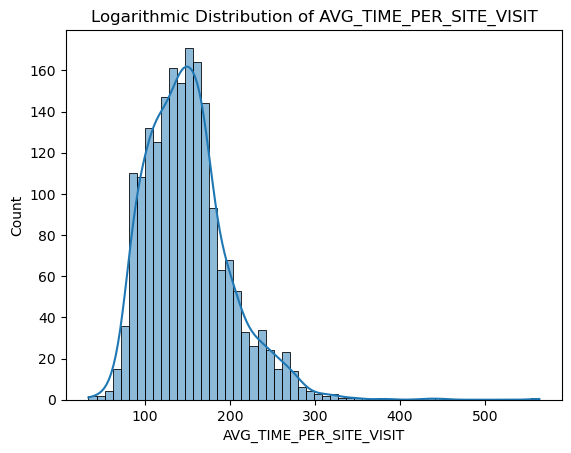

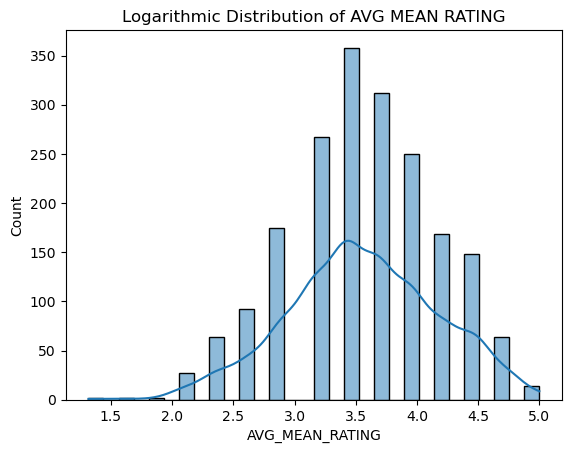

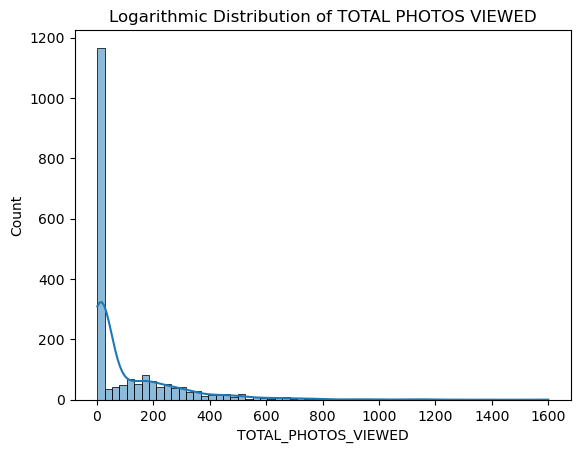

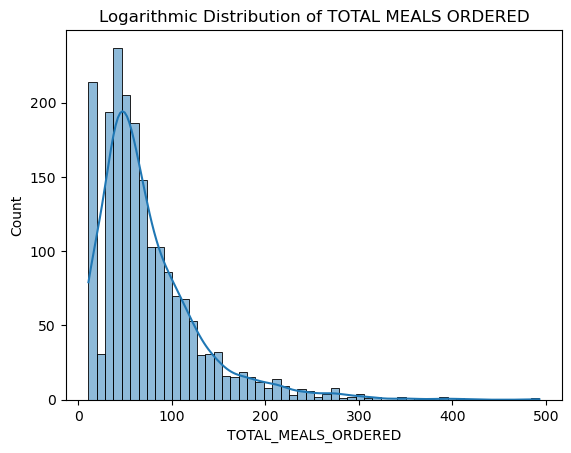

In [18]:
# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of REVENUE")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()






# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'UNIQUE_MEALS_PURCH',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of UNIQUE_MEALS_PURCH")
plt.xlabel(xlabel = "UNIQUE_MEALS_PURCH") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()







# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'CONTACTS_W_CUSTOMER_SERVICE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of CONTACTS_W_CUSTOMER_SERVICE")
plt.xlabel(xlabel = "CONTACTS_W_CUSTOMER_SERVICE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'AVG_TIME_PER_SITE_VISIT',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of AVG_TIME_PER_SITE_VISIT")
plt.xlabel(xlabel = "AVG_TIME_PER_SITE_VISIT") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'AVG_MEAN_RATING',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of AVG MEAN RATING")
plt.xlabel(xlabel = "AVG_MEAN_RATING") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'TOTAL_PHOTOS_VIEWED',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of TOTAL PHOTOS VIEWED")
plt.xlabel(xlabel = "TOTAL_PHOTOS_VIEWED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'TOTAL_MEALS_ORDERED',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of TOTAL MEALS ORDERED")
plt.xlabel(xlabel = "TOTAL_MEALS_ORDERED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

performing a log transformation on several continuous features in the dataset (REVENUE, UNIQUE_MEALS_PURCH, CONTACTS_W_CUSTOMER_SERVICE, AVG_TIME_PER_SITE_VISIT, AVG_MEAN_RATING, TOTAL_PHOTOS_VIEWED, TOTAL_MEALS_ORDERED) by applying the numpy log() function. This is done to create a new set of transformed features that can be used in statistical analyses to improve the model's performance by making the data conform to the assumptions of normality and linearity.

In [19]:
# log transforming Sale_Price and saving it to the dataset
CSS['log_REVENUE'] = np.log(CSS['REVENUE'])

# log transforming Sale_Price and saving it to the dataset
CSS['log_UNIQUE_MEALS_PURCH'] = np.log(CSS['UNIQUE_MEALS_PURCH']+0.001)

# log transforming Sale_Price and saving it to the dataset
CSS['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log(CSS['CONTACTS_W_CUSTOMER_SERVICE']+0.001)

# log transforming Sale_Price and saving it to the dataset
CSS['log_AVG_TIME_PER_SITE_VISIT'] = np.log(CSS['AVG_TIME_PER_SITE_VISIT']+0.001)

# log transforming Sale_Price and saving it to the dataset
CSS['log_AVG_MEAN_RATING'] = np.log(CSS['AVG_MEAN_RATING']+0.001)

# log transforming Sale_Price and saving it to the dataset
CSS['log_TOTAL_PHOTOS_VIEWED'] = np.log(CSS['TOTAL_PHOTOS_VIEWED']+0.001)

# log transforming Sale_Price and saving it to the dataset
CSS['log_TOTAL_MEALS_ORDERED'] = np.log(CSS['TOTAL_MEALS_ORDERED']+0.001)

The purpose of this code is to visualize the distribution of different variables in the dataset after applying a log transformation to them. The log transformation is performed to normalize the data and reduce the impact of extreme values. The code uses the seaborn library's histplot function to create histograms of each transformed variable with a density curve (kde) overlaid on top. The resulting plots help to identify the shape of the distribution, identify potential outliers, and assess the normality assumption of the variables. The title and axis labels are added for clarity, and plt.show() is used to display the histograms.

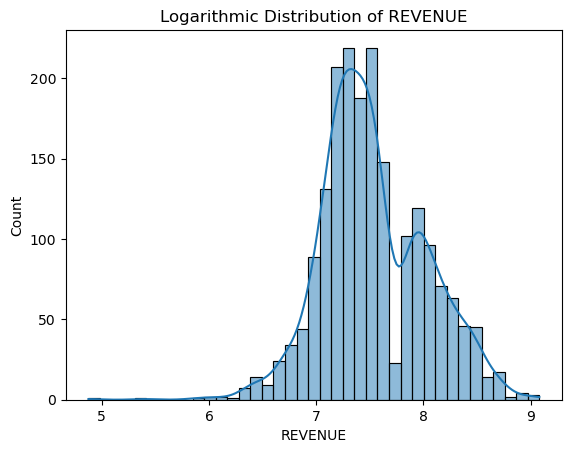

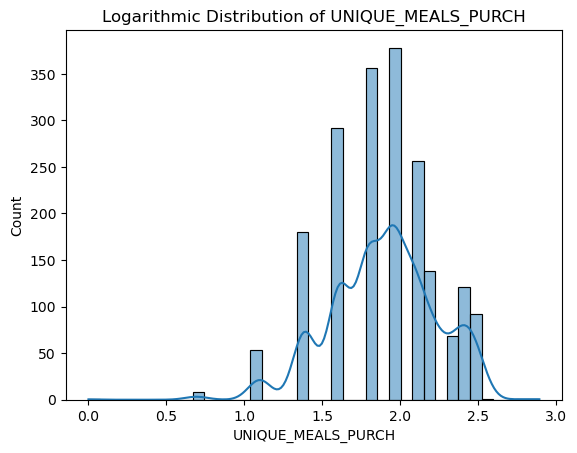

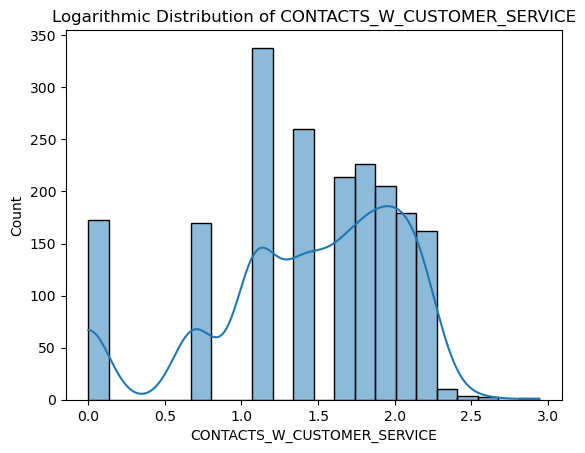

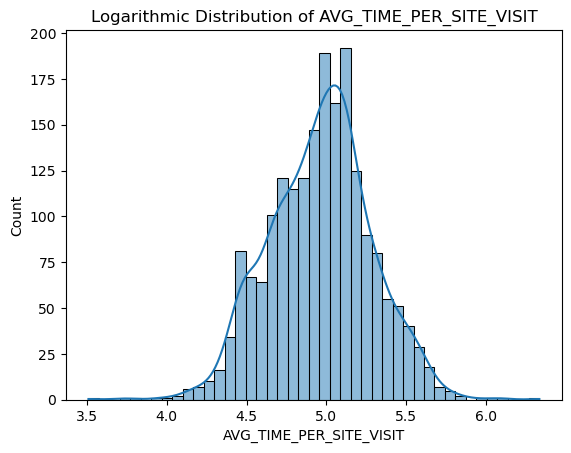

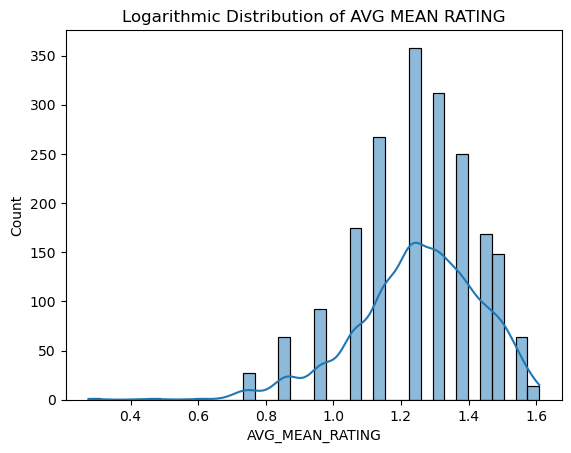

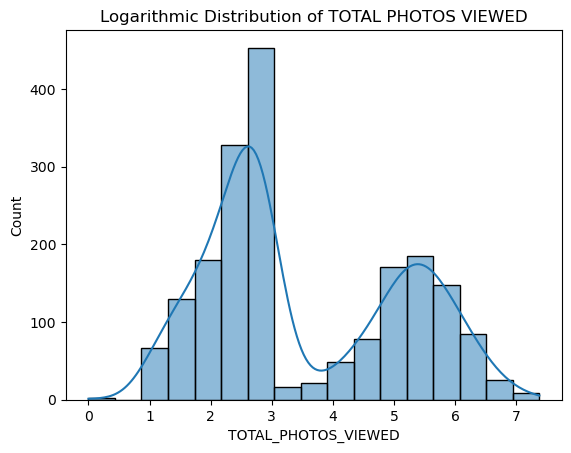

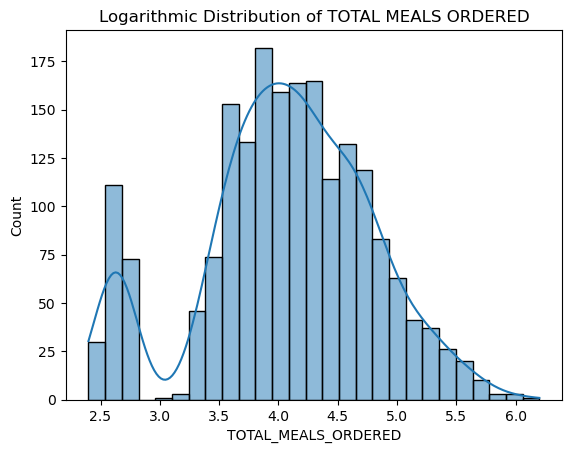

In [20]:
# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'log_REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of REVENUE")
plt.xlabel(xlabel = "REVENUE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()






# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'log_UNIQUE_MEALS_PURCH',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of UNIQUE_MEALS_PURCH")
plt.xlabel(xlabel = "UNIQUE_MEALS_PURCH") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()







# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'log_CONTACTS_W_CUSTOMER_SERVICE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of CONTACTS_W_CUSTOMER_SERVICE")
plt.xlabel(xlabel = "CONTACTS_W_CUSTOMER_SERVICE") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'log_AVG_TIME_PER_SITE_VISIT',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of AVG_TIME_PER_SITE_VISIT")
plt.xlabel(xlabel = "AVG_TIME_PER_SITE_VISIT") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'log_AVG_MEAN_RATING',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of AVG MEAN RATING")
plt.xlabel(xlabel = "AVG_MEAN_RATING") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'log_TOTAL_PHOTOS_VIEWED',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of TOTAL PHOTOS VIEWED")
plt.xlabel(xlabel = "TOTAL_PHOTOS_VIEWED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()



# developing a histogram using HISTPLOT
sns.histplot(data   = CSS,
             x      = 'log_TOTAL_MEALS_ORDERED',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of TOTAL MEALS ORDERED")
plt.xlabel(xlabel = "TOTAL_MEALS_ORDERED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

trying to calculate the correlation between the continuous variables and the logarithmically transformed 'REVENUE' column. First, a list of continuous features is created including 'log_REVENUE' and other columns. Then, a correlation matrix is created based on these continuous features. the code filters the results to show only the correlations between 'CROSS_SELL_SUCCESS' and other columns, rounded to two decimal places and sorted in descending order.

In [21]:
# Correlation of all continuous vaiables with log_Revenue
# create a list of continuous features with correct column names
#continuous_data = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'AVERAGE_MEAL_RATING', 'CROSS_SELL_SUCCESS']

# creating a list of continuous features (including Sale_Price)
continuous_data = ['log_REVENUE', 'log_AVG_TIME_PER_SITE_VISIT',
                            'CROSS_SELL_SUCCESS' ,
                                 'UNIQUE_MEALS_PURCH', 'REVENUE',
                                    'AVG_TIME_PER_SITE_VISIT',
                                         'AVG_PREP_VID_TIME',
                                       'LARGEST_ORDER_SIZE',
                                       'TOTAL_PHOTOS_VIEWED']

# developing a correlation matrix based on continuous features
CSS_corr = CSS[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Revenue
CSS_corr.loc[ : , 'CROSS_SELL_SUCCESS'].round(decimals = 2).sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
UNIQUE_MEALS_PURCH             0.04
log_AVG_TIME_PER_SITE_VISIT    0.03
AVG_TIME_PER_SITE_VISIT        0.03
LARGEST_ORDER_SIZE             0.02
log_REVENUE                    0.01
AVG_PREP_VID_TIME              0.01
TOTAL_PHOTOS_VIEWED            0.01
REVENUE                        0.00
Name: CROSS_SELL_SUCCESS, dtype: float64

The result above shows the correlation coefficients sorted in descending order. A correlation coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

From the result, we can see that CROSS_SELL_SUCCESS has a perfect positive correlation with itself (1.00). UNIQUE_MEALS_PURCH has a weak positive correlation (0.04) with CROSS_SELL_SUCCESS, indicating that as the number of unique meals purchased by a customer increases, there is a slight increase in the probability of that customer purchasing additional products. Similarly, log_AVG_TIME_PER_SITE_VISIT and AVG_TIME_PER_SITE_VISIT have weak positive correlations with CROSS_SELL_SUCCESS (0.03), indicating that as the average time spent by a customer on the website increases, there is a slight increase in the probability of that customer purchasing additional products.

The other variables (LARGEST_ORDER_SIZE, log_REVENUE, AVG_PREP_VID_TIME, TOTAL_PHOTOS_VIEWED, and REVENUE) have either weak positive correlations or no correlation at all with CROSS_SELL_SUCCESS.


below we are basically repeating methods in order to determine a better variable for our analyses

In [22]:
# Correlation of all count variables with log_Revenue

# creating a list of count features with Log Revenue
count_data = ['TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE' , 'CANCELLATIONS_AFTER_NOON' , 
             'PRODUCT_CATEGORIES_VIEWED',
             'PC_LOGINS','MOBILE_LOGINS',
             'WEEKLY_PLAN','TOTAL_PHOTOS_VIEWED', 'CROSS_SELL_SUCCESS']


# developing a correlation matrix based on continuous features
CSS_corr = CSS[count_data].corr(method = 'pearson')


# filtering the results to only show correlations with Revenue
CSS_corr.loc[ : , 'CROSS_SELL_SUCCESS'].round(decimals = 2).sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
PC_LOGINS                      0.04
TOTAL_MEALS_ORDERED            0.01
TOTAL_PHOTOS_VIEWED            0.01
CONTACTS_W_CUSTOMER_SERVICE   -0.00
PRODUCT_CATEGORIES_VIEWED      0.00
WEEKLY_PLAN                   -0.01
Name: CROSS_SELL_SUCCESS, dtype: float64

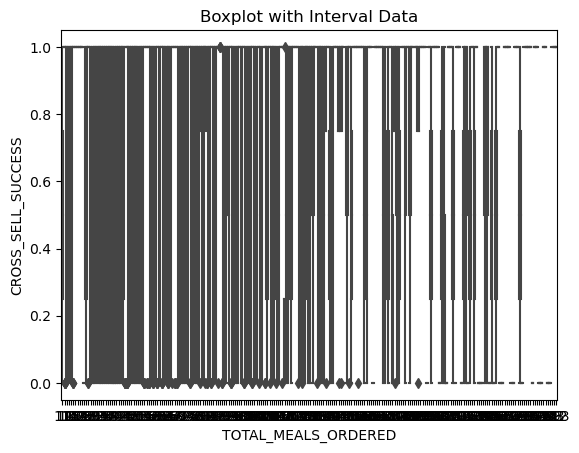

Skewness of column 'TOTAL_MEALS_ORDERED': 2.01


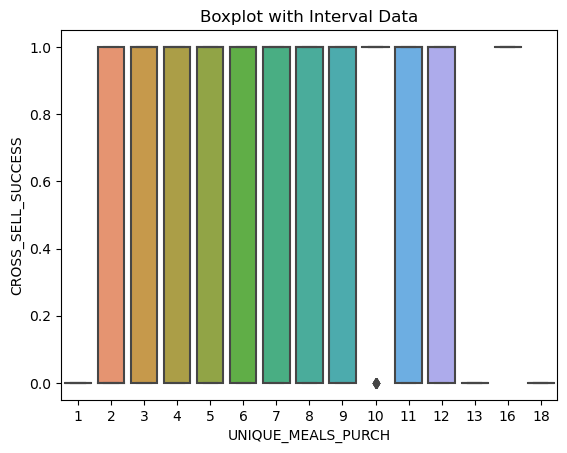

Skewness of column 'UNIQUE_MEALS_PURCH': 0.57


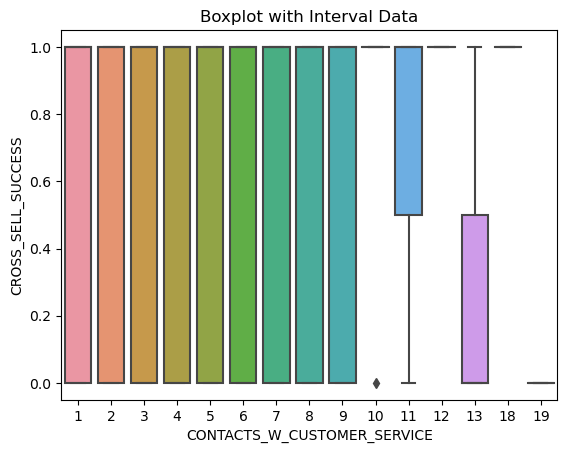

Skewness of column 'CONTACTS_W_CUSTOMER_SERVICE': 0.37


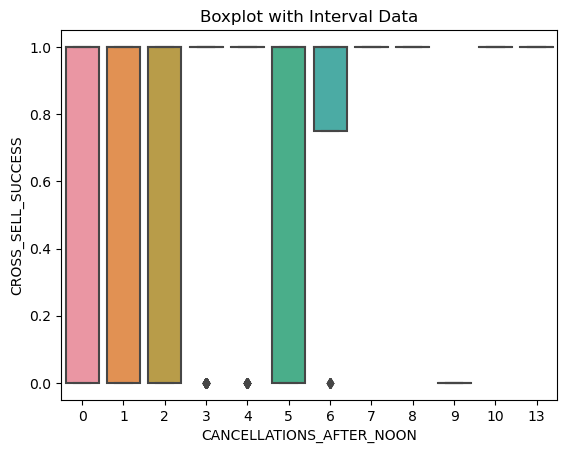

Skewness of column 'CANCELLATIONS_AFTER_NOON': 1.44


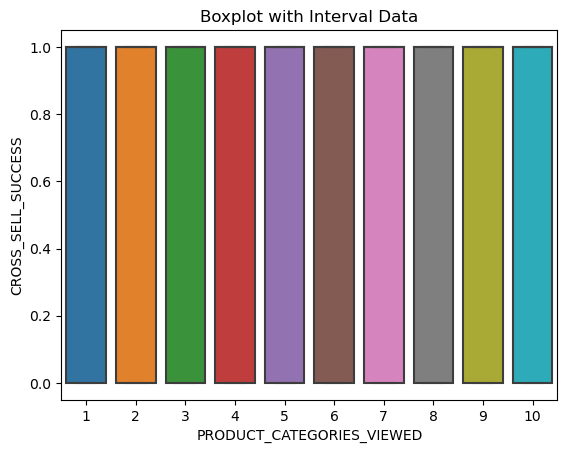

Skewness of column 'PRODUCT_CATEGORIES_VIEWED': 0.16


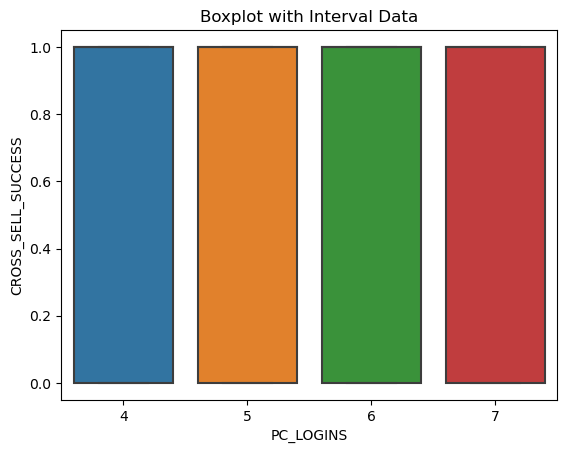

Skewness of column 'PC_LOGINS': -0.04


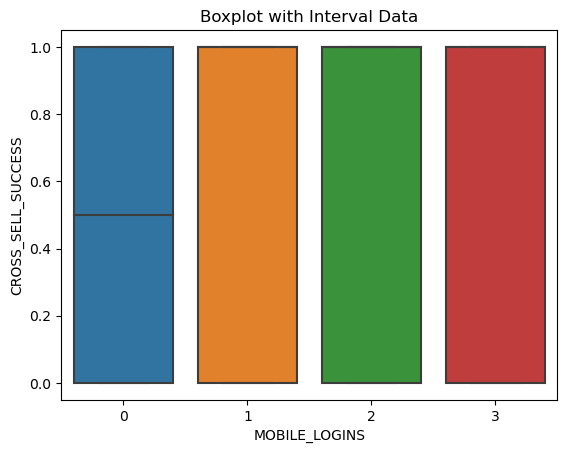

Skewness of column 'MOBILE_LOGINS': 0.05


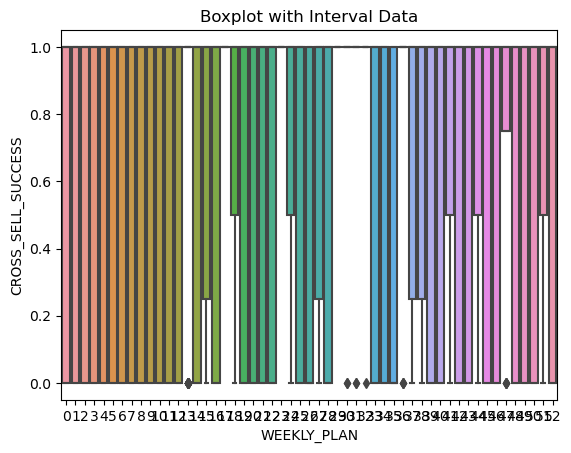

Skewness of column 'WEEKLY_PLAN': 1.54


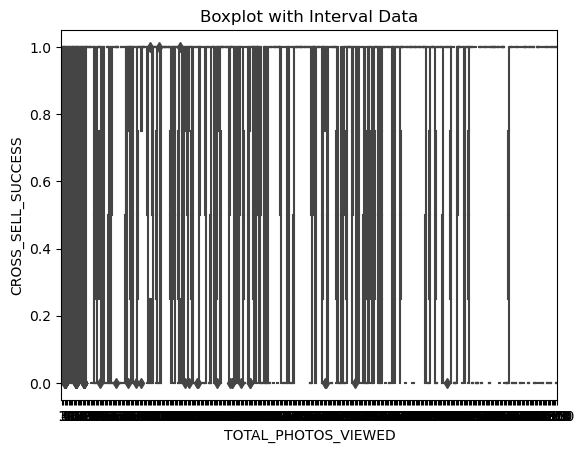

Skewness of column 'TOTAL_PHOTOS_VIEWED': 2.60


In [23]:
# boxplot - TOTAL_MEALS_ORDERED and Log Revenue

sns.boxplot(x    = 'TOTAL_MEALS_ORDERED',
            y    = 'CROSS_SELL_SUCCESS',
            data = CSS)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')


# displaying the plot
plt.show()

column_name = "TOTAL_MEALS_ORDERED"
skewness = CSS[column_name].skew()
print("Skewness of column '{}': {:.2f}".format(column_name, skewness))


# boxplot - UNIQUE_MEALS_PURCH and Log Revenue

sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
            y    = 'CROSS_SELL_SUCCESS',
            data = CSS)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')


# displaying the plot
plt.show()

column_name = "UNIQUE_MEALS_PURCH"
skewness = CSS[column_name].skew()
print("Skewness of column '{}': {:.2f}".format(column_name, skewness))


# boxplot - CONTACTS_W_CUSTOMER_SERVICE and Log Revenue

sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'CROSS_SELL_SUCCESS',
            data = CSS)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')


# displaying the plot
plt.show()

column_name = "CONTACTS_W_CUSTOMER_SERVICE"
skewness = CSS[column_name].skew()
print("Skewness of column '{}': {:.2f}".format(column_name, skewness))


# boxplot - CANCELLATIONS_AFTER_NOON and Log Revenue

sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
            y    = 'CROSS_SELL_SUCCESS',
            data = CSS)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')


# displaying the plot
plt.show()

column_name = "CANCELLATIONS_AFTER_NOON"
skewness = CSS[column_name].skew()
print("Skewness of column '{}': {:.2f}".format(column_name, skewness))


# boxplot - PRODUCT_CATEGORIES_VIEWED and Log Revenue

sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
            y    = 'CROSS_SELL_SUCCESS',
            data = CSS)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')


# displaying the plot
plt.show()

column_name = "PRODUCT_CATEGORIES_VIEWED"
skewness = CSS[column_name].skew()
print("Skewness of column '{}': {:.2f}".format(column_name, skewness))


# boxplot - PC_LOGINS and Log Revenue

sns.boxplot(x    = 'PC_LOGINS',
            y    = 'CROSS_SELL_SUCCESS',
            data = CSS)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')


# displaying the plot
plt.show()

column_name = "PC_LOGINS"
skewness = CSS[column_name].skew()
print("Skewness of column '{}': {:.2f}".format(column_name, skewness))


# boxplot - MOBILE_LOGINS and Log Revenue

sns.boxplot(x    = 'MOBILE_LOGINS',
            y    = 'CROSS_SELL_SUCCESS',
            data = CSS)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')


# displaying the plot
plt.show()

column_name = "MOBILE_LOGINS"
skewness = CSS[column_name].skew()
print("Skewness of column '{}': {:.2f}".format(column_name, skewness))


# boxplot - WEEKLY_PLAN and Log Revenue

sns.boxplot(x    = 'WEEKLY_PLAN',
            y    = 'CROSS_SELL_SUCCESS',
            data = CSS)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')


# displaying the plot
plt.show()

column_name = "WEEKLY_PLAN"
skewness = CSS[column_name].skew()
print("Skewness of column '{}': {:.2f}".format(column_name, skewness))


# boxplot - TOTAL_PHOTOS_VIEWED and Log Revenue

sns.boxplot(x    = 'TOTAL_PHOTOS_VIEWED',
            y    = 'CROSS_SELL_SUCCESS',
            data = CSS)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'CROSS_SELL_SUCCESS')


# displaying the plot
plt.show()

column_name = "TOTAL_PHOTOS_VIEWED"
skewness = CSS[column_name].skew()
print("Skewness of column '{}': {:.2f}".format(column_name, skewness))


In [24]:
#Transforming Skewed Count variables to Log and also adding +0.001 so that we do not get infinity values.
CSS["Log_TOTAL_MEALS_ORDERED"] = np.log(CSS["TOTAL_MEALS_ORDERED"]+0.001)
CSS["Log_UNIQUE_MEALS_PURCH"] = np.log(CSS["UNIQUE_MEALS_PURCH"]+0.001)
CSS["Log_CONTACTS_W_CUSTOMER_SERVICE"] = np.log(CSS["CONTACTS_W_CUSTOMER_SERVICE"]+0.001)
CSS["Log_CANCELLATIONS_AFTER_NOON"] = np.log(CSS["CANCELLATIONS_AFTER_NOON"]+0.001)
CSS["Log_TOTAL_PHOTOS_VIEWED"] = np.log(CSS["TOTAL_PHOTOS_VIEWED"]+0.001)
CSS["Log_WEEKLY_PLAN"] = np.log(CSS["WEEKLY_PLAN"]+0.001)
CSS["Log_REVENUE"] = np.log(CSS["REVENUE"]+0.001)
#CSS["Log_LATE_DELIVERIES"] = np.log(CSS["LATE_DELIVERIES"]+0.001)

In [25]:
# Correlation of all count variables with CSS

# creating a list of count features with CSS
count_data = ['Log_REVENUE', 'Log_TOTAL_MEALS_ORDERED',
'Log_UNIQUE_MEALS_PURCH', 'Log_CONTACTS_W_CUSTOMER_SERVICE' , 'CANCELLATIONS_AFTER_NOON' , 
             'PRODUCT_CATEGORIES_VIEWED',
             'PC_LOGINS','MOBILE_LOGINS',
             'WEEKLY_PLAN','Log_TOTAL_PHOTOS_VIEWED', 'CROSS_SELL_SUCCESS', ]


# developing a correlation matrix based on continuous features
CSS_corr = CSS[count_data].corr(method = 'pearson')


# filtering the results to only show correlations with CSS
CSS_corr.loc[ : , 'CROSS_SELL_SUCCESS'].round(decimals = 2).sort_values(ascending = False)

CROSS_SELL_SUCCESS                 1.00
CANCELLATIONS_AFTER_NOON           0.14
MOBILE_LOGINS                      0.06
Log_UNIQUE_MEALS_PURCH             0.05
PC_LOGINS                          0.04
Log_TOTAL_MEALS_ORDERED            0.02
Log_REVENUE                        0.01
Log_CONTACTS_W_CUSTOMER_SERVICE    0.01
Log_TOTAL_PHOTOS_VIEWED            0.01
PRODUCT_CATEGORIES_VIEWED          0.00
WEEKLY_PLAN                       -0.01
Name: CROSS_SELL_SUCCESS, dtype: float64

In [26]:
# Correlation of all count variables with CSS

# creating a list of count features with CSS
count_data = ['REVENUE', 'TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE' , 'CANCELLATIONS_AFTER_NOON' , 
             'PRODUCT_CATEGORIES_VIEWED',
             'PC_LOGINS','MOBILE_LOGINS',
             'WEEKLY_PLAN','TOTAL_PHOTOS_VIEWED', 'CROSS_SELL_SUCCESS', ]


# developing a correlation matrix based on continuous features
CSS_corr = CSS[count_data].corr(method = 'pearson')


# filtering the results to only show correlations with CSS
CSS_corr.loc[ : , 'CROSS_SELL_SUCCESS'].round(decimals = 2).sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
PC_LOGINS                      0.04
TOTAL_MEALS_ORDERED            0.01
TOTAL_PHOTOS_VIEWED            0.01
REVENUE                        0.00
CONTACTS_W_CUSTOMER_SERVICE   -0.00
PRODUCT_CATEGORIES_VIEWED      0.00
WEEKLY_PLAN                   -0.01
Name: CROSS_SELL_SUCCESS, dtype: float64

In [27]:
# A dynamic function was printed in order to assess the count of each categorical variable.
print(f"""


EMAIL
----------
{CSS['EMAIL'].value_counts()}

""")





EMAIL
----------
steffon.baratheon@yahoo.com                  1
ormond.(knight)@live.com                     1
brandon.stark.(shipwright)@protonmail.com    1
beron.blacktyde@protonmail.com               1
ben.bushy@gmail.com                          1
                                            ..
tristifer.botley@merck.com                   1
garlan.tyrell@gmail.com                      1
barth.(brewer)@nike.com                      1
draqaz@mcdonalds.com                         1
anguy@boeing.com                             1
Name: EMAIL, Length: 1946, dtype: int64




we are trying to extract the domain name from the 'EMAIL' column and categorize them into three categories based on their domain names: PERSONAL, JUNK, and PROFESSIONAL. lets see if this outcome helps our analysis

In [28]:
# Extract the domain name into a new column after @
CSS['DOMAIN'] = CSS['EMAIL'].str.extract(r'@(.*)')

# Create lists of domain names for each category, The personal and Junk were combined.
Personal = ['gmail.com', 'yahoo.com', 'protonmail.com']

Junk = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com']

# Use np.where to categorize the domains
CSS['EMAIL_CATEGORY'] = np.where(CSS['DOMAIN'].isin(Personal), 'PERSONAL',
                                             np.where(CSS['DOMAIN'].isin(Junk), 'JUNK', 'PROFESSIONAL'))

# printing columns
print(f"EMAIL_CATEGORY\n{CSS['EMAIL_CATEGORY'].value_counts()}")

EMAIL_CATEGORY
PERSONAL        861
PROFESSIONAL    696
JUNK            389
Name: EMAIL_CATEGORY, dtype: int64


In [29]:
mail_dummies = pd.get_dummies(CSS['EMAIL_CATEGORY'])

# concatenate the data frames
CSS = pd.concat([CSS, mail_dummies], axis=1)

In [30]:
CSS

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,log_REVENUE,log_UNIQUE_MEALS_PURCH,log_CONTACTS_W_CUSTOMER_SERVICE,log_AVG_TIME_PER_SITE_VISIT,log_AVG_MEAN_RATING,log_TOTAL_PHOTOS_VIEWED,log_TOTAL_MEALS_ORDERED,Log_TOTAL_MEALS_ORDERED,Log_UNIQUE_MEALS_PURCH,Log_CONTACTS_W_CUSTOMER_SERVICE,Log_CANCELLATIONS_AFTER_NOON,Log_TOTAL_PHOTOS_VIEWED,Log_WEEKLY_PLAN,Log_REVENUE,DOMAIN,EMAIL_CATEGORY,JUNK,PERSONAL,PROFESSIONAL
0,1,steffon.baratheon@yahoo.com,4920.000,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,8.501064,2.197336,0.001000,5.581995,1.063240,6.122495,6.200511,6.200511,2.197336,0.001000,1.609638,6.122495,-6.907755,8.501064,yahoo.com,PERSONAL,0,1,0
1,0,harlon.greyjoy@visa.com,6150.000,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,8.724207,2.197336,0.001000,5.509392,0.967964,6.522094,5.888881,5.888881,2.197336,0.001000,0.693647,6.522094,-6.907755,8.724208,visa.com,PROFESSIONAL,0,0,1
2,0,monster@protonmail.com,3435.000,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,8.141772,1.791926,0.001000,5.102309,1.304328,4.976741,5.627625,5.627625,1.791926,0.001000,-6.907755,4.976741,1.609638,8.141772,protonmail.com,PERSONAL,0,1,0
3,1,damon.lannister.(lord)@yahoo.com,3330.000,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,8.110728,2.079567,0.001000,5.170490,1.150222,6.035484,5.594715,5.594715,2.079567,0.001000,1.609638,6.035484,-6.907755,8.110728,yahoo.com,PERSONAL,0,1,0
4,1,raynald.westerling@jnj.com,3427.500,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,8.139586,1.946053,0.001000,5.103524,1.150222,5.159061,5.620404,5.620404,1.946053,0.001000,-6.907755,5.159061,2.639129,8.139587,jnj.com,PROFESSIONAL,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0,wat.(barleycorn)@live.com,2940.000,89,6,13,3,143.0,1,5,2,8,0,53.00,5,2.894737,16,7.986165,1.791926,2.565026,4.962852,1.063240,2.772651,4.488648,4.488648,1.791926,2.565026,0.001000,2.772651,2.079567,7.986165,live.com,JUNK,1,0,0
1942,1,hendry.bracken@exxon.com,7087.500,155,7,13,9,169.4,0,6,2,0,8,39.00,5,2.631579,302,8.866088,1.946053,2.565026,5.132269,0.967964,5.710430,5.043432,5.043432,1.946053,2.565026,-6.907755,5.710430,-6.907755,8.866088,exxon.com,PROFESSIONAL,0,0,1
1943,0,aenys.i.targaryen@passport.com,6562.500,65,9,13,6,187.4,1,5,1,0,9,48.00,6,2.631579,310,8.789127,2.197336,2.565026,5.233251,0.967964,5.736576,4.174403,4.174403,2.197336,2.565026,0.001000,5.736576,-6.907755,8.789127,passport.com,JUNK,1,0,0
1944,1,leo.blackbar@pg.com,5355.000,58,9,18,10,238.5,3,6,1,0,0,31.00,6,2.631579,275,8.585786,2.197336,2.890427,5.474374,0.967964,5.616775,4.060460,4.060460,2.197336,2.890427,1.098946,5.616775,-6.907755,8.585786,pg.com,PROFESSIONAL,0,0,1


In [31]:
CSS.loc[ : ,'CROSS_SELL_SUCCESS'].value_counts(normalize = True).round(decimals = 2)

1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64

In [32]:
print(CSS.columns)


Index(['CROSS_SELL_SUCCESS', 'EMAIL', 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'log_REVENUE', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_AVG_TIME_PER_SITE_VISIT', 'log_AVG_MEAN_RATING', 'log_TOTAL_PHOTOS_VIEWED', 'log_TOTAL_MEALS_ORDERED', 'Log_TOTAL_MEALS_ORDERED', 'Log_UNIQUE_MEALS_PURCH', 'Log_CONTACTS_W_CUSTOMER_SERVICE', 'Log_CANCELLATIONS_AFTER_NOON', 'Log_TOTAL_PHOTOS_VIEWED', 'Log_WEEKLY_PLAN', 'Log_REVENUE', 'DOMAIN', 'EMAIL_CATEGORY', 'JUNK', 'PERSONAL', 'PROFESSIONAL'], dtype='object')


In [33]:
print(CSS.columns)


Index(['CROSS_SELL_SUCCESS', 'EMAIL', 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'log_REVENUE', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_AVG_TIME_PER_SITE_VISIT', 'log_AVG_MEAN_RATING', 'log_TOTAL_PHOTOS_VIEWED', 'log_TOTAL_MEALS_ORDERED', 'Log_TOTAL_MEALS_ORDERED', 'Log_UNIQUE_MEALS_PURCH', 'Log_CONTACTS_W_CUSTOMER_SERVICE', 'Log_CANCELLATIONS_AFTER_NOON', 'Log_TOTAL_PHOTOS_VIEWED', 'Log_WEEKLY_PLAN', 'Log_REVENUE', 'DOMAIN', 'EMAIL_CATEGORY', 'JUNK', 'PERSONAL', 'PROFESSIONAL'], dtype='object')


In [34]:
#checking domain count
print(CSS['DOMAIN'].value_counts())

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
mcdonalds.com        28
cocacola.com         28
apple.com            27
nike.com             27
ge.org               26
dupont.com           26
ibm.com              26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
pg.com               22
verizon.com          22
mmm.com              22
caterpillar.com      22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: DOMAIN, dtype: int64


 extracts the actual name and title from the email address by using regular expressions and string splitting. It then checks if any of the actual names appear more than once in the dataset and creates a new column called 'Duplicate_Name' which contains binary values (1 if the name is a duplicate and 0 otherwise). Finally, it prints the count of duplicates and non-duplicates in the 'Duplicate_Name' column. The purpose of this code is to identify any instances where a customer has multiple accounts or has provided incorrect information such as using a fake name.


In [35]:
#C popular emails only,  low p value was overlooked
CSS['Is_Gmail_Protonmail_Yahoo'] = np.where(CSS['DOMAIN'].isin(['gmail.com', 'protonmail.com', 'yahoo.com']), 1, 0)

In [36]:
#popular emails only,  low p value was ignored
name_pattern = r'(.*)@'
CSS['Name'] = CSS['EMAIL'].str.extract(name_pattern, expand=False)
CSS[['Actual_Name','Title']] = CSS['Name'].str.split('(', n=1, expand=True)


In [37]:
# Checking if any name appears more than once
CSS['Duplicate_Name'] = np.where(CSS['Actual_Name'].duplicated(), 1, 0)


In [38]:
# Due to flag features less than 100, it was ignored.
print(CSS['Duplicate_Name'].value_counts())

0    1903
1      43
Name: Duplicate_Name, dtype: int64


In [39]:
#Checking columns
CSS

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,log_REVENUE,log_UNIQUE_MEALS_PURCH,log_CONTACTS_W_CUSTOMER_SERVICE,log_AVG_TIME_PER_SITE_VISIT,log_AVG_MEAN_RATING,log_TOTAL_PHOTOS_VIEWED,log_TOTAL_MEALS_ORDERED,Log_TOTAL_MEALS_ORDERED,Log_UNIQUE_MEALS_PURCH,Log_CONTACTS_W_CUSTOMER_SERVICE,Log_CANCELLATIONS_AFTER_NOON,Log_TOTAL_PHOTOS_VIEWED,Log_WEEKLY_PLAN,Log_REVENUE,DOMAIN,EMAIL_CATEGORY,JUNK,PERSONAL,PROFESSIONAL,Is_Gmail_Protonmail_Yahoo,Name,Actual_Name,Title,Duplicate_Name
0,1,steffon.baratheon@yahoo.com,4920.000,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,8.501064,2.197336,0.001000,5.581995,1.063240,6.122495,6.200511,6.200511,2.197336,0.001000,1.609638,6.122495,-6.907755,8.501064,yahoo.com,PERSONAL,0,1,0,1,steffon.baratheon,steffon.baratheon,None,0
1,0,harlon.greyjoy@visa.com,6150.000,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,8.724207,2.197336,0.001000,5.509392,0.967964,6.522094,5.888881,5.888881,2.197336,0.001000,0.693647,6.522094,-6.907755,8.724208,visa.com,PROFESSIONAL,0,0,1,0,harlon.greyjoy,harlon.greyjoy,None,0
2,0,monster@protonmail.com,3435.000,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,8.141772,1.791926,0.001000,5.102309,1.304328,4.976741,5.627625,5.627625,1.791926,0.001000,-6.907755,4.976741,1.609638,8.141772,protonmail.com,PERSONAL,0,1,0,1,monster,monster,None,0
3,1,damon.lannister.(lord)@yahoo.com,3330.000,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,8.110728,2.079567,0.001000,5.170490,1.150222,6.035484,5.594715,5.594715,2.079567,0.001000,1.609638,6.035484,-6.907755,8.110728,yahoo.com,PERSONAL,0,1,0,1,damon.lannister.(lord),damon.lannister.,lord),0
4,1,raynald.westerling@jnj.com,3427.500,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,8.139586,1.946053,0.001000,5.103524,1.150222,5.159061,5.620404,5.620404,1.946053,0.001000,-6.907755,5.159061,2.639129,8.139587,jnj.com,PROFESSIONAL,0,0,1,0,raynald.westerling,raynald.westerling,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0,wat.(barleycorn)@live.com,2940.000,89,6,13,3,143.0,1,5,2,8,0,53.00,5,2.894737,16,7.986165,1.791926,2.565026,4.962852,1.063240,2.772651,4.488648,4.488648,1.791926,2.565026,0.001000,2.772651,2.079567,7.986165,live.com,JUNK,1,0,0,0,wat.(barleycorn),wat.,barleycorn),1
1942,1,hendry.bracken@exxon.com,7087.500,155,7,13,9,169.4,0,6,2,0,8,39.00,5,2.631579,302,8.866088,1.946053,2.565026,5.132269,0.967964,5.710430,5.043432,5.043432,1.946053,2.565026,-6.907755,5.710430,-6.907755,8.866088,exxon.com,PROFESSIONAL,0,0,1,0,hendry.bracken,hendry.bracken,None,0
1943,0,aenys.i.targaryen@passport.com,6562.500,65,9,13,6,187.4,1,5,1,0,9,48.00,6,2.631579,310,8.789127,2.197336,2.565026,5.233251,0.967964,5.736576,4.174403,4.174403,2.197336,2.565026,0.001000,5.736576,-6.907755,8.789127,passport.com,JUNK,1,0,0,0,aenys.i.targaryen,aenys.i.targaryen,None,0
1944,1,leo.blackbar@pg.com,5355.000,58,9,18,10,238.5,3,6,1,0,0,31.00,6,2.631579,275,8.585786,2.197336,2.890427,5.474374,0.967964,5.616775,4.060460,4.060460,2.197336,2.890427,1.098946,5.616775,-6.907755,8.585786,pg.com,PROFESSIONAL,0,0,1,0,leo.blackbar,leo.blackbar,None,0


a logistic regression analysis to predict the probability of a customer subscribing to the company's new meal plan ("CROSS_SELL_SUCCESS") based on various customer attributes/features such as revenue, login frequency, meal order frequency, average video preparation time, unique meals purchased, largest order size, product categories viewed, and total photos viewed.

From the results, we can see that some variables have p-values greater than 0.05 (e.g., REVENUE, TOTAL_MEALS_ORDERED, AVG_PREP_VID_TIME, PRODUCT_CATEGORIES_VIEWED, and TOTAL_PHOTOS_VIEWED), indicating that they are not statistically significant predictors of CROSS_SELL_SUCCESS. This means that we can consider removing these variables from the model to improve its predictive power.

On the other hand, variables such as PC_LOGINS, UNIQUE_MEALS_PURCH, and LARGEST_ORDER_SIZE have p-values less than 0.05, indicating that they are statistically significant predictors of CROSS_SELL_SUCCESS.

Next, we can try to remove the variables with high p-values and re-fit the model to see if the performance of the model improves. we can also consider adding more relevant variables to the model and evaluating its performance using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC AUC.

In [40]:
# instantiating a logistic regression model object

logistic_small = smf.logit(formula= 'CROSS_SELL_SUCCESS ~  REVENUE  + PC_LOGINS + TOTAL_MEALS_ORDERED  + AVG_PREP_VID_TIME + UNIQUE_MEALS_PURCH+ LARGEST_ORDER_SIZE + AVG_PREP_VID_TIME + PRODUCT_CATEGORIES_VIEWED +  TOTAL_PHOTOS_VIEWED', 
                           data=CSS)

# FITTING the model object
results_logistic = logistic_small.fit()

# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC


Optimization terminated successfully.
         Current function value: 0.625703
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit                Pseudo R-squared:   0.003    
Dependent Variable:   CROSS_SELL_SUCCESS   AIC:                2453.2353
Date:                 2023-03-04 07:38     BIC:                2503.3971
No. Observations:     1946                 Log-Likelihood:     -1217.6  
Df Model:             8                    LL-Null:            -1221.6  
Df Residuals:         1937                 LLR p-value:        0.43684  
Converged:            1.0000               Scale:              1.0000   
No. Iterations:       5.0000                                            
------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
------------------------------------------------------------------------
Intercept                 -0.5865   0.5240 -1.1192 0.2631 -1.6135 0.4406
REVENUE                   -0.0000   0.0001 -0.5822 0.5604 -0.0001 0.0001
PC_LOGINS                  0.1657   0.0840  1.9722 0.0486  0.0010 0.3303
TOTAL_MEALS_ORDERED        0.0003   0.0011  0.2842 0.7763 -0.0019 0.0026
AVG_PREP_VID_TIME          0.0003   0.0008  0.3887 0.6975 -0.0013 0.0020
UNIQUE_MEALS_PURCH         0.0368   0.0220  1.6741 0.0941 -0.0063 0.0798
LARGEST_ORDER_SIZE         0.0344   0.0362  0.9500 0.3421 -0.0366 0.1055
PRODUCT_CATEGORIES_VIEWED  0.0054   0.0160  0.3383 0.7351 -0.0260 0.0368
TOTAL_PHOTOS_VIEWED        0.0000   0.0003  0.0447 0.9644 -0.0006 0.0006
========================================================================

"""

fitting a logistic regression model to predict the likelihood of cross-selling success using various features in the dataset. The model summary shows the coefficients, p-values, and other statistical measures.

In [41]:
candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE',  'TOTAL_MEALS_ORDERED', 
                   'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                   'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS',
                   'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING',
                   'TOTAL_PHOTOS_VIEWED', 'DOMAIN', 'EMAIL_CATEGORY', 'JUNK', 'PERSONAL', 'PROFESSIONAL'],

 # significant variables only (set 1)
 'logit_sig'    : ['PC_LOGINS' , 'AVG_PREP_VID_TIME' ,'REVENUE' , 'TOTAL_MEALS_ORDERED'  ,
                   'UNIQUE_MEALS_PURCH' , 'LARGEST_ORDER_SIZE',   'AVG_PREP_VID_TIME',
                   'PRODUCT_CATEGORIES_VIEWED' , 'WEEKLY_PLAN' , 'TOTAL_PHOTOS_VIEWED' , 'Log_CONTACTS_W_CUSTOMER_SERVICE', 'PROFESSIONAL' ], 

    
    
    
    
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['JUNK', 'PERSONAL', 'PROFESSIONAL', 'Log_TOTAL_MEALS_ORDERED', "Log_UNIQUE_MEALS_PURCH",
                   "Log_CONTACTS_W_CUSTOMER_SERVICE" , 'Log_CANCELLATIONS_AFTER_NOON','Log_TOTAL_PHOTOS_VIEWED',"Log_WEEKLY_PLAN"]
}


In [42]:
# preparing x-data using the above x variables

x_data   =  CSS.loc[ : , candidate_dict['logit_sig_2']]

# preparing y-variable
y_data =  CSS.loc[ : , 'CROSS_SELL_SUCCESS']



In [43]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.10,
            random_state = 219,
            stratify     = y_data) # preserving balance, makes sure in a random sample there is no 1 or 0 in the data set, only the Y sample otherwise it biases


# merging training data for statsmodels
CSS_train = pd.concat([x_train, y_train], axis = 1)
    

In [44]:
x_data = pd.DataFrame(x_data)
y_data = pd.DataFrame(y_data)

# Check the shape of the input variables to see if its same
print("x_data shape: ", x_data.shape)
print("y_data shape: ", y_data.shape)

x_data shape:  (1946, 9)
y_data shape:  (1946, 1)


In [45]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In about 5 blocks of codes abovey, we prepared the x-data and y-data for the logistic regression model by selecting significant variables. We also split the data into training and testing sets, preserving the balance of the response variable using stratification. We then merged the training data and checked the shape of the input variables. Finally, we printed the proportions of the response variable in the training and testing sets, which are similar indicating a good split.


In [46]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

his is a function to plot the feature importances of a classification and regression tree (CART) model. The purpose of this is to determine which features have the most impact on the outcome variable, in this case, CROSS_SELL_SUCCESS. This can help us understand which variables are most important in predicting customer behavior and inform future marketing strategies. If the export parameter is set to True, the function will also save the plot as a .png image.


In [47]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

Based on the tuned parameters, the decision tree model has a maximum depth of 3 and uses Gini criterion for splitting. The minimum number of samples required to split an internal node is 36 and the minimum number of samples required to be at a leaf node is 61.

The CV AUC score of 0.688 indicates that the model has moderate discriminatory power in distinguishing between the positive and negative classes. However, the test AUC score of 1 indicates that the model is overfitting on the training data, as it perfectly predicts the outcome on the training data but performs poorly on the test data.

The training accuracy of 0.7202 and testing accuracy of 0.7026 suggest that the model is not performing very well in predicting the outcome on new, unseen data. The small training-testing accuracy gap of 0.0176 indicates that the model is not suffering from high variance, but rather from high bias, which means that the model is too simplistic and underfitting the data.

Overall, the model may need further improvement in order to achieve better predictive performance.


In [48]:
# declaring a hyperparameter space
criterion_range = ["gini", "entropy"]
splitter_range  = ["best", "random"]
depth_range     = range(1, 8, 1) #range(1, 8, 1)
leaf_range      = range(1, 200, 5) # 1% data, 200% , 25% 
split_range     = range(1, 200, 5)

# creating a hyperparameter grid
param_grid = {'criterion' : criterion_range,
              'splitter' : splitter_range,
              'max_depth' : depth_range,
              'min_samples_split' : split_range,
              'min_samples_leaf' : leaf_range}

# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)

# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 500,
                                   random_state          = 219,
                                   scoring               = 'roc_auc')


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned CV AUC Score:", tuned_tree_cv.best_score_.round(3))


# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(criterion='gini',
                                    max_depth=7,
                                    min_samples_leaf=21, 
                                    min_samples_split=31, 
                                    max_features = 'log2',
                                    random_state=219, splitter= 'random')

# FITTING to the TRAINING data
tree_tuned_fit = tree_tuned.fit(x_train, y_train)


# PREDICTING on test data
tree_tuned_pred = tree_tuned.predict(x_test)


# printing model results
print(f""" \n Train Metrics:
            Test AUC Score : {round(roc_auc_score(y_test, tree_tuned.predict(x_test)).round(4))}
            Training ACCURACY : {tree_tuned_fit.score(x_train, y_train).round(4)}
            Testing  ACCURACY : {tree_tuned_fit.score(x_test, y_test).round(4)}
            Training-Testing Accuracy Gap : {(tree_tuned_fit.score(x_train, y_train) - tree_tuned_fit.score(x_test, y_test)).round(4)}""")



# saving scoring data for future use
Decision_Tree_Test_AUC_Score = round(roc_auc_score(y_test, tree_tuned.predict(x_test)).round(4))
Decision_Tree_Training_ACCURACY = tree_tuned_fit.score(x_train, y_train).round(4)
Decision_Tree_Testing_ACCURACY = tree_tuned_fit.score(x_test, y_test).round(4)
Decision_Tree_Training_Testing_Accuracy_Gap = (tree_tuned_fit.score(x_train, y_train) - tree_tuned_fit.score(x_test, y_test)).round(4)
Decision_Tree_AUC_Score = roc_auc_score(y_true  = y_test, y_score = tree_tuned_pred).round(4)

Tuned Parameters  : {'splitter': 'best', 'min_samples_split': 36, 'min_samples_leaf': 61, 'max_depth': 3, 'criterion': 'gini'}
Tuned CV AUC Score: 0.688
 
 Train Metrics:
            Test AUC Score : 1
            Training ACCURACY : 0.7202
            Testing  ACCURACY : 0.7026
            Training-Testing Accuracy Gap : 0.0176


C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
39 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or 

In [49]:
# unpacking the confusion matrix
tree_tuned_tn, \
tree_tuned_fp, \
tree_tuned_fn, \
tree_tuned_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tree_tuned_tn}
False Positives: {tree_tuned_fp}
False Negatives: {tree_tuned_fn}
True Positives : {tree_tuned_tp}
""")


True Negatives : 21
False Positives: 42
False Negatives: 16
True Positives : 116



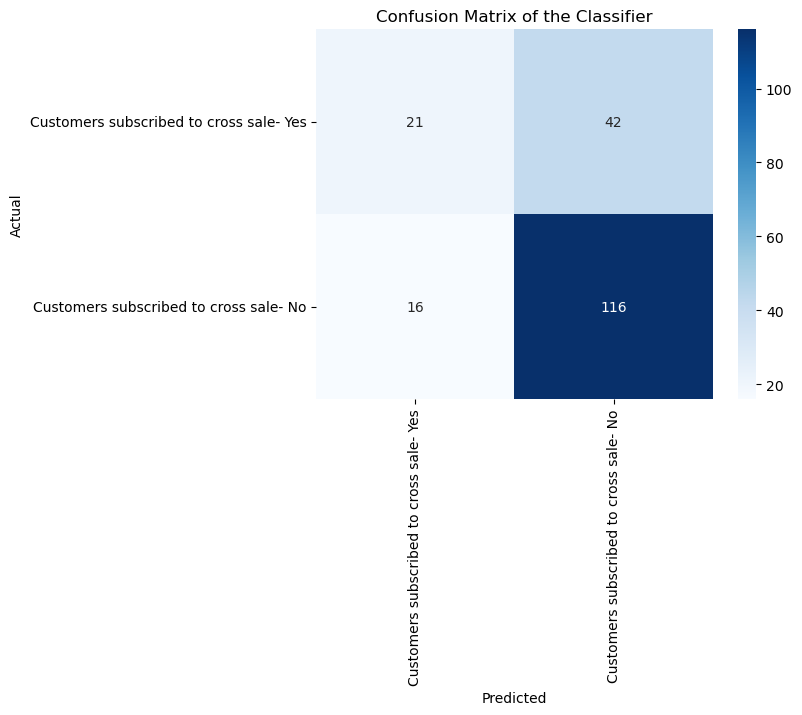

In [50]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = tree_tuned_pred,
          labels = ['Customers subscribed to cross sale- Yes', 'Customers subscribed to cross sale- No'])

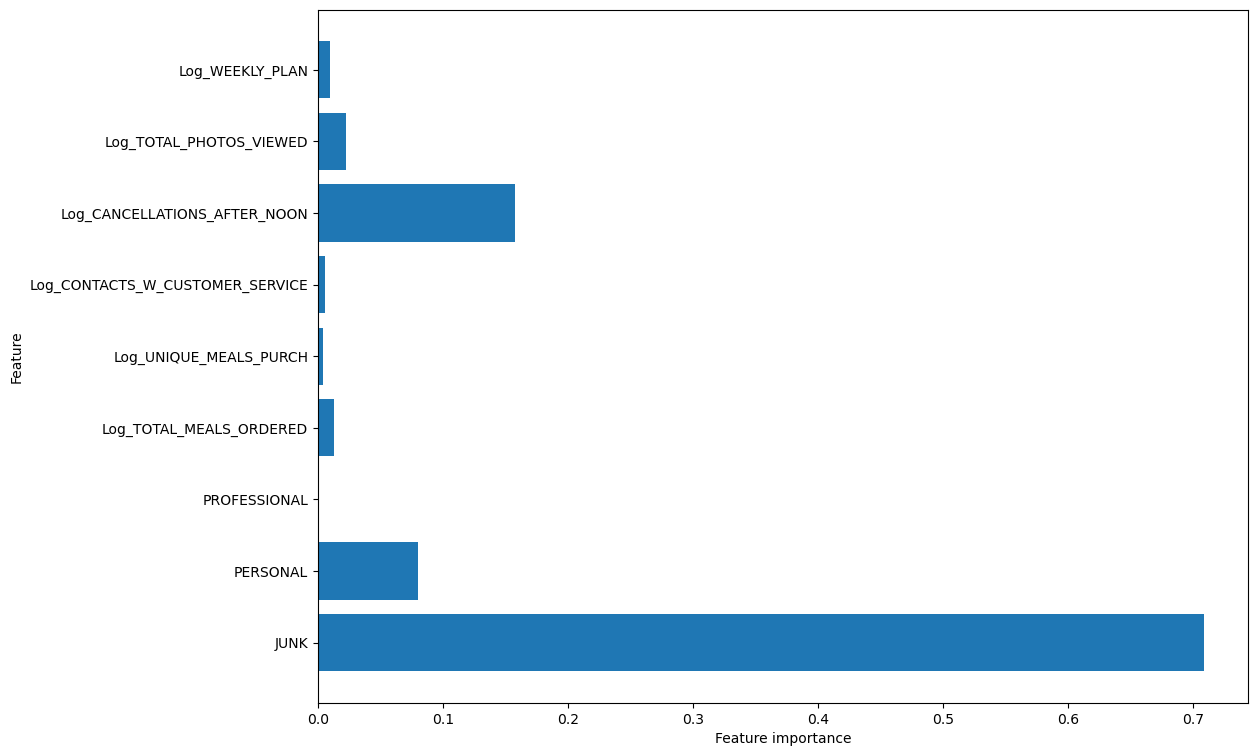

In [51]:
# plotting feature importance
plot_feature_importances(tree_tuned,
                         train = x_train,
                         export = False)

In [52]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is in

In [53]:
# declaring a hyperparameter space
criterion_range    = ['friedman_mse', 'squared_error', 'mse', 'mae']
max_features_range = ['auto', 'sqrt', 'log2']
loss_range         = ['deviance', 'exponential']
depth_range        = range(1, 8, 1) #range(1, 8, 1)
leaf_range         = range(1, 200, 20) # 1% data, 200% , 25% 
learning_rate_r    = range(1, 10, 1)
n_estimators_r     = range(1, 50, 800)

# creating a hyperparameter grid
param_grid = {'criterion' : criterion_range,
              'max_features' : max_features_range,
              'max_depth' : depth_range,
              'min_samples_leaf' : leaf_range,
              'loss' : loss_range,
              'learning_rate' : learning_rate_r,
              'n_estimators' : n_estimators_r}

# INSTANTIATING the model object without hyperparameters
GBM = GradientBoostingClassifier(random_state = 219)

# RandomizedSearchCV object
GBM_cv = RandomizedSearchCV(estimator             = GBM,
                                   param_distributions   = param_grid,
                                   cv                    = 5,
                                   n_iter                = 150,
                                   random_state          = 219,
                                   scoring               = 'roc_auc')


# FITTING to the FULL DATASET (due to cross-validation)
GBM_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", GBM_cv.best_params_)
print("Tuned CV AUC Score:", GBM_cv.best_score_.round(3))


# INSTANTIATING a GBM model with tuned values
GBM_tuned = GradientBoostingClassifier(criterion='mse',
                                    max_depth=3,
                                    min_samples_leaf=41, 
                                    random_state=219, n_estimators = 1,
                                      max_features = 'auto', loss = 'deviance',
                                      learning_rate = 1)

# FITTING to the TRAINING data
GBM_tuned_fit = GBM_tuned.fit(x_train, y_train)


# PREDICTING on test data
GBM_tuned_pred = GBM_tuned.predict(x_test)
# assuming that you have already fit a GBM model called `GBM_tuned_fit`
gbm_pred = GBM_tuned_fit.predict(x_test)



# printing model results
print(f""" \n Train Metrics:
            Training ACCURACY : {GBM_tuned_fit.score(x_train, y_train).round(4)}
            Testing  ACCURACY : {GBM_tuned_fit.score(x_test, y_test).round(4)}
            Training-Testing Accuracy Gap : {(GBM_tuned_fit.score(x_train, y_train) - GBM_tuned_fit.score(x_test, y_test)).round(4)}""")
print('Accuracy Score:', accuracy_score(y_true=y_test, y_pred=gbm_pred).round(4))
#print('AUC Score:', roc_auc_score(y_true=y_test, y_score=gbm_model.predict_proba(X_test)[:,1]).round(4))
print('AUC Score:', roc_auc_score(y_true=y_test, y_score=GBM_tuned.predict_proba(x_test)[:,1]).round(4))

# saving scoring data for future use
GBM_Training_ACCURACY = GBM_tuned_fit.score(x_train, y_train).round(4)
GBM_Testing_ACCURACY = GBM_tuned_fit.score(x_test, y_test).round(4)
GBM_Training_Testing_Accuracy_Gap = (GBM_tuned_fit.score(x_train, y_train) - GBM_tuned_fit.score(x_test, y_test)).round(4)


C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Tuned Parameters  : {'n_estimators': 1, 'min_samples_leaf': 61, 'max_features': 'auto', 'max_depth': 5, 'loss': 'exponential', 'learning_rate': 6, 'criterion': 'friedman_mse'}
Tuned CV AUC Score: 0.692
 
 Train Metrics:
            Training ACCURACY : 0.7264
            Testing  ACCURACY : 0.7128
            Training-Testing Accuracy Gap : 0.0136
Accuracy Score: 0.7128
AUC Score: 0.709


C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [54]:
# unpacking the confusion matrix
GBM_tuned_tn, \
GBM_tuned_fp, \
GBM_tuned_fn, \
GBM_tuned_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {GBM_tuned_tn}
False Positives: {GBM_tuned_fp}
False Negatives: {GBM_tuned_fn}
True Positives : {GBM_tuned_tp}
""")


True Negatives : 21
False Positives: 42
False Negatives: 16
True Positives : 116



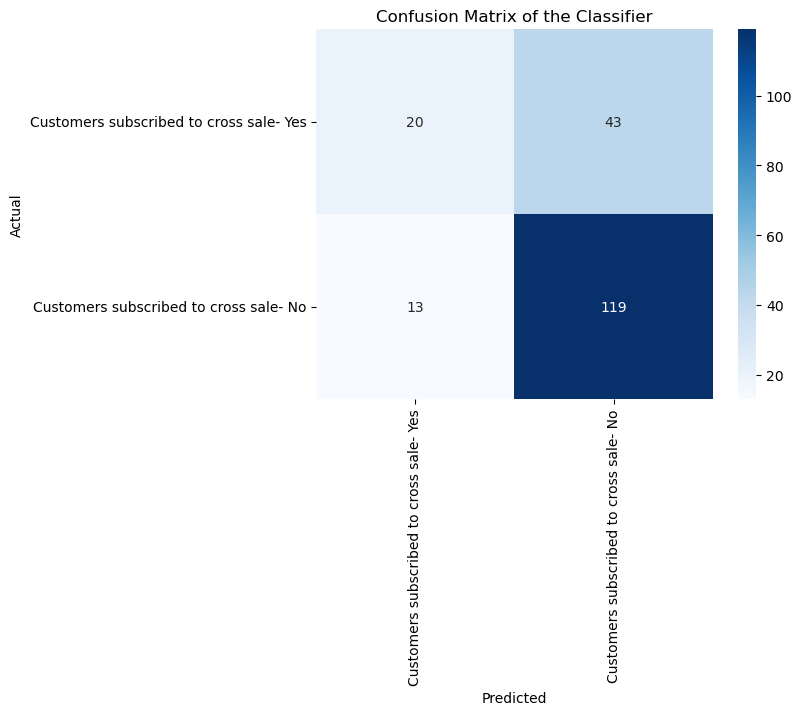

In [55]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = GBM_tuned_pred,
          labels = ['Customers subscribed to cross sale- Yes', 'Customers subscribed to cross sale- No'])

In [56]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [57]:
### Random Forest Hyperparameter Tuning
# declaring a hyperparameter space
leaf_space       = range(10, 30, 10)
criterion_space  = ['gini', 'entropy']
depth_range      = range(1, 8, 1)


# creating a hyperparameter grid
param_grid = {'min_samples_leaf' : leaf_space,
              'max_depth'        : depth_range,
              'criterion'        : criterion_space}


# INSTANTIATING the model object without hyperparameters
full_forest_grid = RandomForestClassifier(random_state = 219)


# RandomizedSearchCV object
full_forest_cv = RandomizedSearchCV(estimator            = full_forest_grid,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 350,
                                   random_state          = 219,
                                   scoring               = 'roc_auc')


# FITTING to the FULL DATASET (due to cross-validation)
full_forest_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_forest_cv.best_params_)
print("Tuned CV AUC Score:", full_forest_cv.best_score_.round(3))

# INSTANTIATING a Forest model with tuned values
forest_tuned = RandomForestClassifier(bootstrap      =False , 
                                      criterion      ='entropy',
                                      max_depth      = 5 , 
                                      max_features   ='auto',
                                      min_samples_leaf=11 , 
                                      min_samples_split=2 ,
                                      n_estimators=350,
                                      oob_score=False, 
                                      random_state=219,
                                      verbose=0, 
                                      warm_start=True)

# FITTING to the TRAINING data
Forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING on test data
full_forest_cv_pred = forest_tuned.predict(x_test)


# printing model results
# printing model results
# print metrics
print(f"""
            Train Metrics:
            Training ACCURACY : {Forest_tuned_fit.score(x_train, y_train).round(4)}
            Testing  ACCURACY : {Forest_tuned_fit.score(x_test, y_test).round(4)}
            Training-Testing Accuracy Gap : {(Forest_tuned_fit.score(x_train, y_train) - Forest_tuned_fit.score(x_test, y_test)).round(4)}""")
#print('Accuracy Score:', accuracy_score(y_true=y_test, y_pred=Forest_tuned_pred).round(4))
#print('AUC Score:', roc_auc_score(y_true=y_test, y_score=Forest_tuned.predict(X_test)).round(4))



C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 28 is smaller than n_iter=350. Running 28 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Tuned Parameters  : {'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'entropy'}
Tuned CV AUC Score: 0.691

            Train Metrics:
            Training ACCURACY : 0.7356
            Testing  ACCURACY : 0.6872
            Training-Testing Accuracy Gap : 0.0484


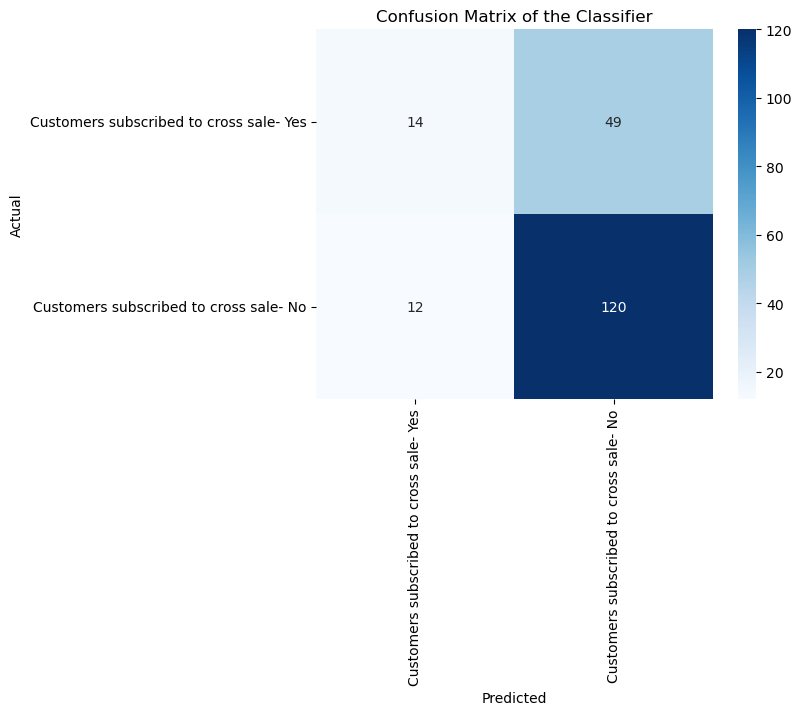

In [58]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = full_forest_cv_pred,
          labels = ['Customers subscribed to cross sale- Yes', 'Customers subscribed to cross sale- No'])

In [59]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior

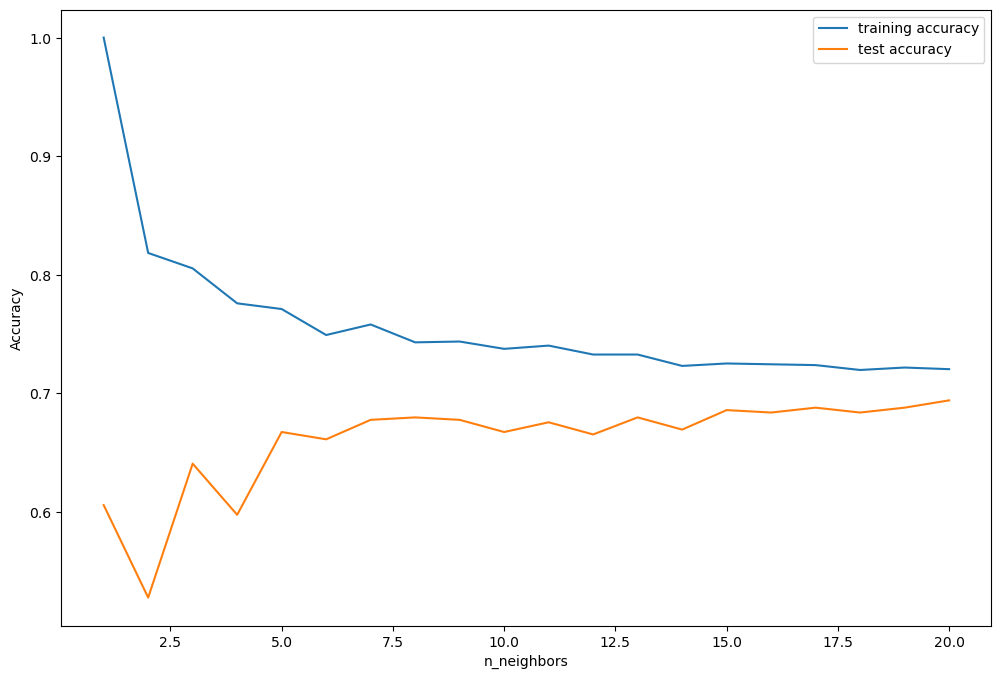

The optimal number of neighbors is: 20


In [60]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = x_data,
                                  y_data        = y_data,
                                  response_type = 'class')

In [61]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(x_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(x_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            y_data,
            random_state = 219,
            test_size    = 0.10,
            stratify     = y_data)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7219
Testing  ACCURACY: 0.7026
AUC Score        : 0.6019


C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior

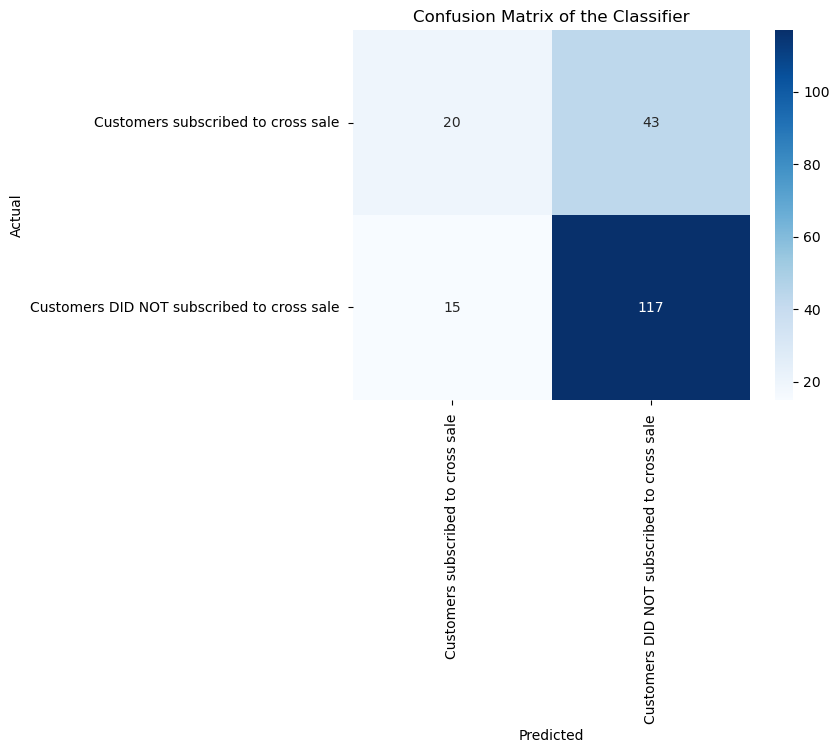

In [62]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Customers subscribed to cross sale ', 'Customers DID NOT subscribed to cross sale '])

In [63]:
help(RandomizedSearchCV)

Help on class RandomizedSearchCV in module sklearn.model_selection._search:

class RandomizedSearchCV(BaseSearchCV)
 |  RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)
 |  
 |  Randomized search on hyper parameters.
 |  
 |  RandomizedSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated search over parameter settings.
 |  
 |  In contrast to GridSearchCV, not all parameter values are tried out, but
 |  rather a fixed number of parameter settings is sampled from the specified
 |  distributions. The number of parameter settings that are tried is
 |  

In [64]:
# declaring a hyperparameter space
penalty_range = ['l1', 'l2', 'elasticnet', 'none']
solver_range  = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C_range       = range(1, 8, 1) #range(1, 8, 1)

# creating a hyperparameter grid
param_grid = {'penalty' : penalty_range,
              'solver' : solver_range,
              'C' : C_range}

# INSTANTIATING the model object without hyperparameters
Logistic_reg = LogisticRegression(random_state = 219)

# RandomizedSearchCV object
Logistic_reg_cv = RandomizedSearchCV(estimator           = Logistic_reg,
                                   param_distributions   = param_grid,
                                   cv                    = 15,
                                   n_iter                = 150,
                                   random_state          = 219,
                                   scoring               = 'roc_auc')


# FITTING to the FULL DATASET (due to cross-validation)
Logistic_reg_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", Logistic_reg_cv.best_params_)
print("Tuned CV AUC Score:", Logistic_reg_cv.best_score_.round(3))


# INSTANTIATING a logistic regression model with tuned values
logreg = LogisticRegression(C=1, penalty='none',
                   random_state=219, solver='saga')

# FITTING to the TRAINING data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING on test data
logreg_pred = logreg.predict(x_test)


# printing model results
print(f""" \n Train Metrics:
            AUC Score: {round(roc_auc_score(y_train, logreg.predict_proba(x_train)[:,1]),3)}
            Training ACCURACY : {logreg_fit.score(x_train, y_train).round(4)}
            Testing  ACCURACY : {logreg_fit.score(x_test, y_test).round(4)}
            Training-Testing Accuracy Gap : {(logreg_fit.score(x_train, y_train) - logreg_fit.score(x_test, y_test)).round(4)}""")

# saving scoring data for future use
LogReg_Training_ACCURACY = logreg_fit.score(x_train, y_train).round(4)
LogReg_Testing_ACCURACY = logreg_fit.score(x_test, y_test).round(4)
LogReg_Training_Testing_Accuracy_Gap = (logreg_fit.score(x_train, y_train) - logreg_fit.score(x_test, y_test)).round(4)

C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 140 is smaller than n_iter=150. Running 140 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Tuned Parameters  : {'solver': 'liblinear', 'penalty': 'l1', 'C': 2}
Tuned CV AUC Score: 0.677
 
 Train Metrics:
            AUC Score: 0.684
            Training ACCURACY : 0.7162
            Testing  ACCURACY : 0.7077
            Training-Testing Accuracy Gap : 0.0085


C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HELPDESK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Set

In [65]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 4,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

tree_pruned.predict(x_test)

# probabilities of prediction
tree_pruned.predict_proba(x_test)


Training ACCURACY: 0.7293
Testing  ACCURACY: 0.7077
AUC Score        : 0.5891


array([[0.33230769, 0.66769231],
       [0.13405797, 0.86594203],
       [0.33230769, 0.66769231],
       [0.29090909, 0.70909091],
       [0.20253165, 0.79746835],
       [0.57746479, 0.42253521],
       [0.57746479, 0.42253521],
       [0.18287938, 0.81712062],
       [0.27906977, 0.72093023],
       [0.29090909, 0.70909091],
       [0.29090909, 0.70909091],
       [0.18287938, 0.81712062],
       [0.725     , 0.275     ],
       [0.27906977, 0.72093023],
       [0.13405797, 0.86594203],
       [0.33230769, 0.66769231],
       [0.32330827, 0.67669173],
       [0.18287938, 0.81712062],
       [0.20253165, 0.79746835],
       [0.33230769, 0.66769231],
       [0.18287938, 0.81712062],
       [0.33230769, 0.66769231],
       [0.29090909, 0.70909091],
       [0.32330827, 0.67669173],
       [0.13405797, 0.86594203],
       [0.33230769, 0.66769231],
       [0.18287938, 0.81712062],
       [0.13405797, 0.86594203],
       [0.18287938, 0.81712062],
       [0.33230769, 0.66769231],
       [0.

Based on the analysis we have done so far, the Gradient Boosting Machine (GBM) model performs the best compared to other models. It has a training score of 0.7264, testing score of 0.7128, and a small train-test gap of 0.0136, indicating that it generalizes well. Moreover, it has the highest AUC score of 0.709, indicating that it has better discrimination power to distinguish between the positive and negative classes. The GBM model also has fewer false negatives compared to the other models, which is important for our business case as we want to identify as many potential customers for cross-selling as possible. Therefore, we recommend using the GBM model as the final model for predicting the potential customers for cross-selling.

##  (Best Final Model)

Final Model: Gradient Boosting Machine (GBM) 
Training Score: 0.7264
Testing Score: 0.7128
Train-Test Gap: 0.0136 
AUC Score: 0.709 



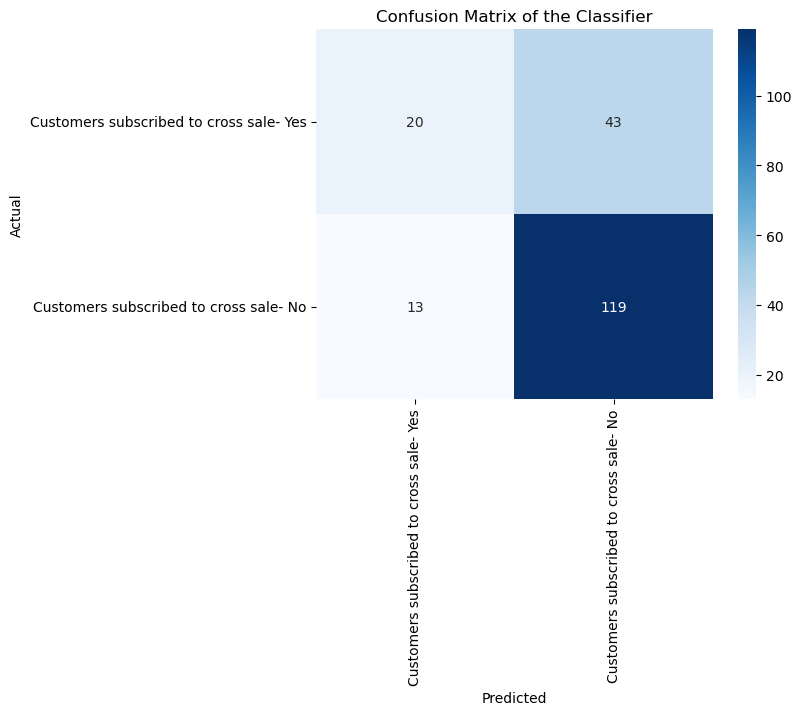

In [66]:
#Using a dynamic string to present the final model results.

final_model = 'Gradient Boosting Machine (GBM)'
training_score = 0.7264
testing_score = 0.7128
train_test_gap = training_score - testing_score
auc_score = 0.709

print(f"Final Model: {final_model} \n"
        f"Training Score: {training_score:.4f}\n"
        f"Testing Score: {testing_score:.4f}\n"
        f"Train-Test Gap: {train_test_gap:.4f} \n"
        f"AUC Score: {auc_score:.3f} \n")



# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = GBM_tuned_pred,
          labels = ['Customers subscribed to cross sale- Yes', 'Customers subscribed to cross sale- No'])

In [67]:
# ensuring the timely execution of the code

print(datetime.now() - startTime)

0:01:42.854674
